In [18]:
# packages and dependencies import
import pandas as pd
import seaborn as sns # Used for Exploratory Data Analysis
import numpy as np
import matplotlib
from pandas import DataFrame

# matplotlib.use('TkAgg')  # or 'QtAgg' if PyQt is installed {pip install PyQt6}
import matplotlib.pyplot as plt

In [19]:
# Data Import
data = pd.read_csv("/home/tjselevani/Desktop/Apps/vscode/python/python analysis/data/last-3-months-transactions.csv")

# Convert 'created_at' column to datetime if not already
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract time in minutes since start of the day
data.loc[:, 'minutes'] = data['created_at'].dt.hour * 60 + data['created_at'].dt.minute

# Extract time in hours since start of the day
data.loc[:, 'hours'] = data['created_at'].dt.hour

# Extract the day of the week (0 = Monday, 6 = Sunday)
data.loc[:, 'day_of_week'] = data['created_at'].dt.dayofweek

# Extract the week from 'created_at'
data.loc[:, 'week'] = data['created_at'].dt.to_period('W').astype(str)

# Extract the month from 'created_at'
data.loc[:, 'month'] = data['created_at'].dt.to_period('M').astype(str)

In [20]:
def format_minutes_xticks():
    """Returns tick positions and labels for minutes of the day."""
    return range(0, 1441, 60), [f"{h}:00" for h in range(0, 25)]

def format_hours_xticks():
    """Returns tick positions and labels for hours of the day."""
    return range(0, 25, 1), [f"{h}:00" for h in range(0, 25)]

def format_days_xticks():
    """Returns tick positions and labels for days of the week."""
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return range(len(days)), days

def format_weeks_xticks(week_labels):
    """Returns tick positions and labels for weeks."""
    return range(len(week_labels)), week_labels

def format_months_xticks(month_labels):
    """Returns tick positions and labels for months."""
    return range(len(month_labels)), month_labels

def format_years_xticks(year_labels):
    """Returns tick positions and labels for years."""
    return range(len(year_labels)), year_labels

In [21]:
# data.head()

In [22]:
# data.tail()

In [23]:
# data.shape

In [24]:
# data.columns

In [25]:
# data.describe()

In [26]:
# data.isnull().sum()

In [27]:
#Data Visualization

In [28]:
# Filter data for the specific vehicle
def get_vehicle_data(vehicle_id):
    """Returns all, credit, and debit transaction data for a given vehicle."""
    vehicle_df = data[data['vehicle_booked'] == vehicle_id].copy()
    vehicle_dt = data[data['transaction_type'] == 'CREDIT'].copy()
    
    return {
        "all": vehicle_dt,
        "credit": vehicle_df[vehicle_df['transaction_type'] == 'CREDIT'].copy(),
        "debit": vehicle_df[vehicle_df['transaction_type'] == 'DEBIT'].copy(),
    }

# Define the vehicles
vehicles = ['SM191', 'SM192', 'SM055', 'SM024', 'SM944']

# Create a dictionary to store data for all vehicles
vehicle_data_dict = {v: get_vehicle_data(v) for v in vehicles}

# Select a specific vehicle dynamically
selected_vehicle = 'SM024'  # Change this to switch vehicles

vehicle_data = vehicle_data_dict[selected_vehicle]['credit']
vehicle_revenue = vehicle_data_dict[selected_vehicle]['debit']
data = vehicle_data_dict[selected_vehicle]['all']


In [29]:
# Define unique colors for each vehicle, plus "Unknown" and "Failed Transactions"
vehicle_colors = {
    'SM191': 'blue',
    'SM192': 'green',
    'SM944': 'yellow',
    'SM055': 'purple',
    'SM024': 'orange',
    'Unknown': 'gray',
    'Failed': 'red'
}

In [30]:
# Yearly totals (extract year from month)
data['year'] = pd.to_datetime(data['created_at']).dt.year
yearly_total = data.groupby('year')['amount'].sum().reset_index()


/tmp/ipykernel_168587/897983752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='amount', data=yearly_total, palette='Blues_d')


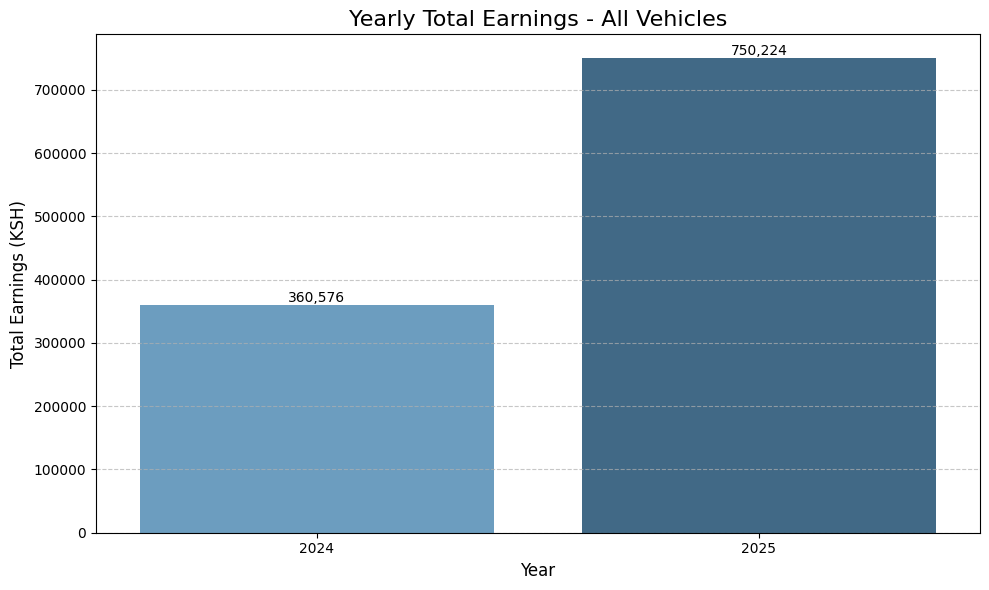

In [ ]:
# VISUALIZATION 5: Yearly comparison for all vehicles
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='amount', data=yearly_total, palette='Blues_d')

plt.title("Yearly Total Earnings - All Vehicles", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, row in yearly_total.iterrows():
    ax.text(i, row['amount'], f"{int(row['amount']):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# plt.savefig("yearly_total_earnings.png", dpi=300)
plt.show()